In [52]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import accuracy_score

#### Zadnie 1)

In [53]:
import numpy as np
from collections import Counter

class kNN:
    def __init__(self, k):
        self.k = k

    def euclidean_distance(self, a, b):
        return np.linalg.norm(a - b)

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []

        for i in range(len(X_test)):
            distances = []
            for j in range(len(self.X_train)):
                distances.append((self.euclidean_distance(X_test[i], self.X_train[j]), self.y_train[j]))
            distances.sort()

            k_nearest = []
            for l in range(self.k):
                k_nearest.append(distances[l][1])

            most_common = Counter(k_nearest).most_common(1)
            predictions.append(most_common[0][0])

        return predictions

In [54]:
iris = datasets.load_iris()
data_iris = pd.DataFrame(iris.data, columns = iris["feature_names"])
data_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [55]:
features_train, features_test, labels_train, labels_test = train_test_split(iris.data, iris.target, test_size=0.3)

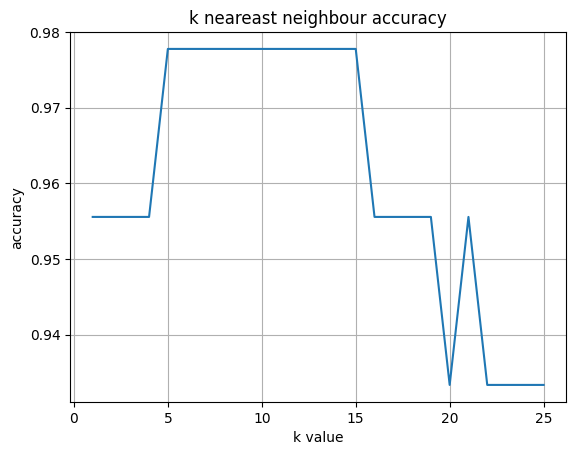

In [56]:
import matplotlib.pyplot as plt

N = 26
x_label = [x for x in range(1, N)]
accuracy = []

for i in range(1, N):
    knn = kNN(i)
    knn.fit(features_train, labels_train)
    features_pred = knn.predict(features_test)
    accuracy.append(accuracy_score(labels_test, features_pred))

plt.plot(x_label, accuracy)
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.title('k neareast neighbour accuracy')
plt.grid(True)
plt.show()

#### Zadanie 2)

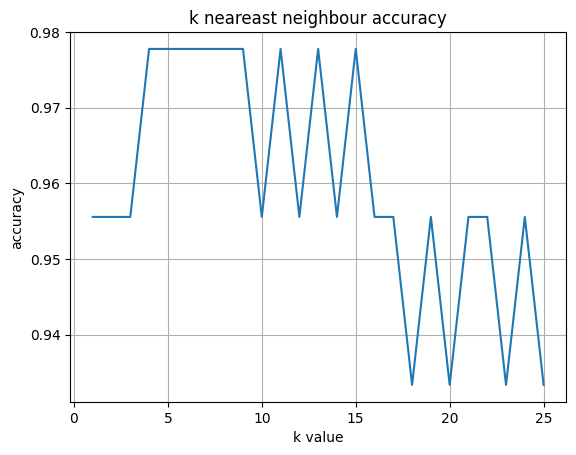

In [57]:
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

N = 26
x_label = [x for x in range(1, N)]
accuracy = []

for i in range(1, N):
    neighbour = KNeighborsClassifier(i)
    neighbour.fit(features_train, labels_train)
    features_pred = neighbour.predict(features_test)
    accuracy.append(accuracy_score(labels_test, features_pred))

plt.plot(x_label, accuracy)
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.title('k neareast neighbour accuracy')
plt.grid(True)
plt.show()

#### Zadanie 3)

In [92]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay
from sklearn import tree
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#Zad 1. Podziel dane na parametry X oraz odpowiedź y:
X = np.concatenate((x_train,x_test),axis = 0)
y = np.concatenate((y_train,y_test),axis=0)

# Standaryzacja
for i in range(X.shape[0]):
    X[i,:] = X[i,:]/np.std(X[i,:])

# Zamiana cyfry 10 -> 0 (błąd w zbiorze danych)    
y[np.where(y==10)]=0

# wysokość i szerokość obrazka z cyfrą 
h = 20
w = 20

# Zad 2. Proszę wyświetlić liczbę cyfr oraz liczbę pikseli przypadającą na jeden obraz
X.shape

(70000, 28, 28)

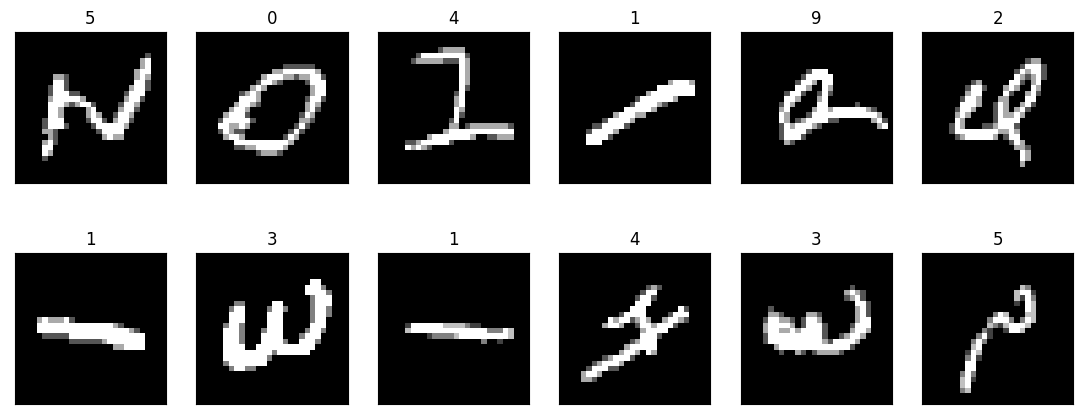

In [93]:
def plot_mnist(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)).T, cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

plot_mnist(X, y, 28, 28, 2, 6)

F1 result: 0.830


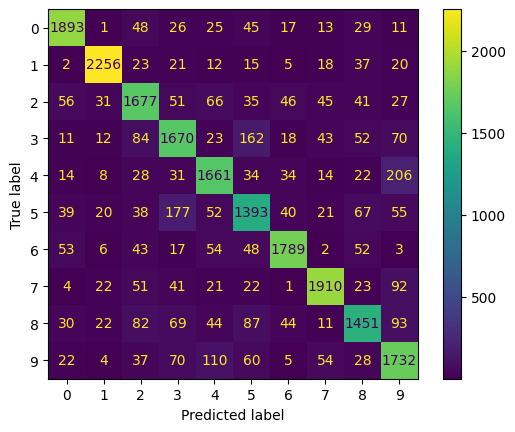

In [94]:
X=X.reshape(X.shape[0], 784)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

DEPTH = 10
clf = tree.DecisionTreeClassifier(max_depth=DEPTH)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(f"F1 result: {f1_score(y_test, y_pred, average='micro'):.3f}")

conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix)
cm_display.plot()
plt.show()

In [97]:
from six import StringIO
import pydot

dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write("result.pdf")

True